In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.image as mpimg
import pandas as pd
import ntpath
import random


c:\Users\junch\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\junch\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\junch\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
df = pd.read_csv("driving_log.csv", names = columns)
#pd.set_option("display.max_colwidth", -1)
df.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\c...,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\...,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\...,0.0,0.000000,0,0.000048
1,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\c...,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\...,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\...,0.0,0.000000,0,0.000044
2,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\c...,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\...,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\...,0.0,0.000000,0,0.000042
3,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\c...,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\...,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\...,0.0,0.000000,0,0.000038
4,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\c...,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\...,C:\Users\Dell XPS\OneDrive\Desktop\mlsus\IMG\...,0.0,0.199523,0,0.062761


In [3]:
def path_leaf(path):
    head, tail =ntpath.split(path)
    return tail

df['center']=df['center'].apply(path_leaf)
df['left']=df['left'].apply(path_leaf)
df['right']=df['right'].apply(path_leaf)
df.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2023_10_20_21_43_17_157.jpg,left_2023_10_20_21_43_17_157.jpg,right_2023_10_20_21_43_17_157.jpg,0.0,0.000000,0,0.000048
1,center_2023_10_20_21_43_17_258.jpg,left_2023_10_20_21_43_17_258.jpg,right_2023_10_20_21_43_17_258.jpg,0.0,0.000000,0,0.000044
2,center_2023_10_20_21_43_17_358.jpg,left_2023_10_20_21_43_17_358.jpg,right_2023_10_20_21_43_17_358.jpg,0.0,0.000000,0,0.000042
3,center_2023_10_20_21_43_17_459.jpg,left_2023_10_20_21_43_17_459.jpg,right_2023_10_20_21_43_17_459.jpg,0.0,0.000000,0,0.000038
4,center_2023_10_20_21_43_17_560.jpg,left_2023_10_20_21_43_17_560.jpg,right_2023_10_20_21_43_17_560.jpg,0.0,0.199523,0,0.062761


[-0.62072904 -0.56598593 -0.51124281 -0.45649969 -0.40175658 -0.34701346
 -0.29227035 -0.23752723 -0.18278411 -0.128041   -0.07329788 -0.01855477
  0.03618835  0.09093147  0.14567458  0.2004177   0.25516081  0.30990393
  0.36464705  0.41939016  0.47413328  0.52887639  0.58361951  0.63836263
  0.69310574]


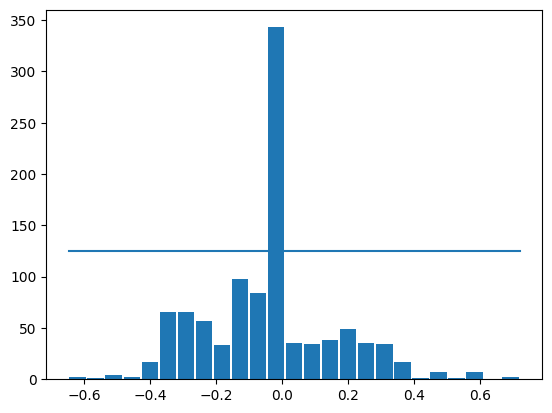

In [4]:
num_bins = 25
samples_per_bin = 125
hist, bins = np.histogram(df['steering'], num_bins)
center = (bins[:-1]+ bins[1:])*0.5
print(center)
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(df['steering']), np.max(df['steering'])), (samples_per_bin, samples_per_bin))

total data: 1033
removed 218
remaining: 815


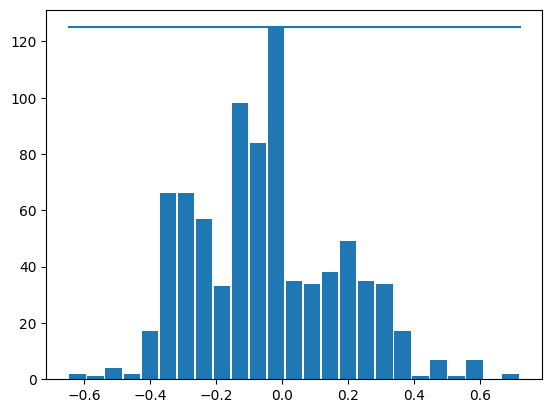

In [5]:
print("total data:", len(df))
remove_list = []
for j in range(num_bins):
    list_ =[]
    for i in range(len(df['steering'])):
        if df['steering'][i] >= bins[j] and df['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_= shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed', len(remove_list))
df.drop(df.index[remove_list], inplace=True)
print('remaining:', len(df))

hist, bins = np.histogram(df['steering'], num_bins)

plt.bar(center, hist, width= 0.05)
plt.plot((np.min(df['steering']), np.max(df['steering'])), (samples_per_bin, samples_per_bin))


In [6]:
#print(df.iloc[1])
print(len(df))
def load_img_steering(df):
    image_path = []
    steering = []

    for i in range(len(df)):
        indexed_data = df.iloc[i]
        center, left,right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append( 'IMG/'+center.strip())
        steering.append(float(indexed_data[3]))
    return image_path, steering
    
image_paths, steerings = load_img_steering(df)
print(len(image_paths))

815
815


652 163


Text(0.5, 1.0, 'Training set')

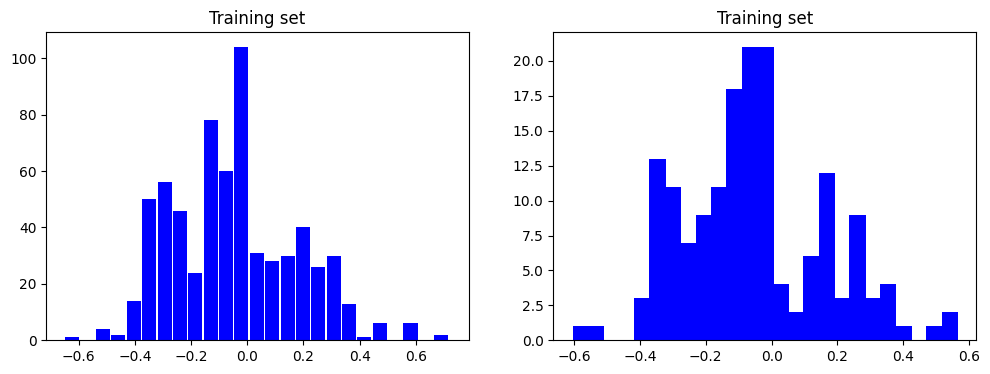

In [7]:
X_train, X_test, y_train, y_test = train_test_split(image_paths, steerings, test_size=0.2, random_state=2)
print(len(X_train), len(X_test))

fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axs[0].set_title('Training set')
axs[1].hist(y_test, bins=num_bins, width=0.05, color='blue')
axs[1].set_title('Training set')

In [8]:
def img_preprocess(img):
    img = mpimg.imread(img)
    img = img[60:135:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3,3), 0 )
    img =  cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'proprocessed image')

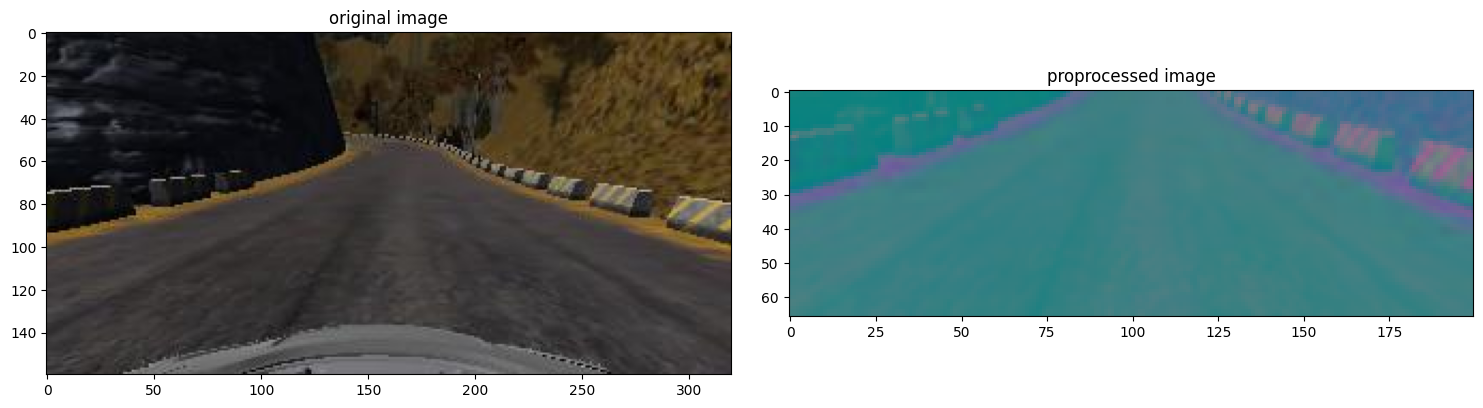

In [9]:
image = image_paths[150]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original image')

axs[1].imshow(preprocessed_image)
axs[1].set_title('proprocessed image')




In [10]:
X_train= np.array(list(map(img_preprocess, X_train)))
X_test = np.array(list(map(img_preprocess, X_test )))

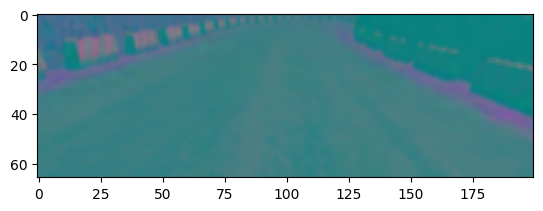

In [11]:
plt.imshow(X_train[200])